# Итоговая работа

In [537]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

from scipy.optimize import minimize
%matplotlib inline

## Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [538]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

#### a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [539]:
#Заведем функцию расчета косинуса угла между векторами -  скалярное произведение делить на произведение евклидовых норм

def cosine(a, b):

    length_a = np.linalg.norm(a)
    lenght_b = np.linalg.norm(b)
    
    return np.dot(a, b) / (length_a * lenght_b)

In [540]:
# Прогоним ее через цикл, где попарно сравним всех пользователей. Критерий - наибольший косинус (наименьший угол)

for i, user in enumerate(list(raitings)):
    
    m = -1
    
    for i_, user_ in enumerate(list(raitings)):

        if i != i_ and cosine(user, user_) > m:
                               
            m = cosine(user, user_)
            best_n = i_ + 1
            
    print('для user ', i + 1, ', ближайший аналог - user ', best_n)

для user  1 , ближайший аналог - user  9
для user  2 , ближайший аналог - user  5
для user  3 , ближайший аналог - user  10
для user  4 , ближайший аналог - user  10
для user  5 , ближайший аналог - user  9
для user  6 , ближайший аналог - user  10
для user  7 , ближайший аналог - user  4
для user  8 , ближайший аналог - user  6
для user  9 , ближайший аналог - user  1
для user  10 , ближайший аналог - user  3


#### b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Для этих целей можно использовать сингулярное разложение (SVD), которое в усеченном виде реализовано, например в методе главных компонента (PCA).

Строится симметричная матрица скалярных произведений всех векторов матрицы. Для этой матрицы находится вектор собственных значений. Результаты  нормализуются (приводятся к единице и получившиеся доли показывают оценочно, какой процент зависимостей объясняют значения того или иного вектора. Можно выбрать лучшие 5.

Но нужно обращать внимание на потерю данных, которая произойдет после выбора. На практике желательно, чтобы потеря не превышала 15-20% объяснения зависимостей


Есть аналогичные методы, например на  базе ковариационных матриц и диспернсий. работают по тому же принипу.

## Задание 2

Вычислите производную 
$tg2(sin(x)+cos(2x+3))$
 в точке 
$x_0=1$
 (на python и на бумаге).

Вручную

In [541]:
#Зададим x как символ
x = sym.Symbol('x')

In [542]:
#вложим функцию в перемнную
fx = sym.tan(sym.sin(x) + sym.cos(2 * x + 3))**2
fx

tan(sin(x) + cos(2*x + 3))**2

In [543]:
#Находим первую производную
dif = sym.diff(fx, x, 1)
dif

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [544]:
#вычисляем производную в точке x=1
dif.subs(x, 1)

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

In [545]:
#Посчитаем числом
2 * (1 + np.tan(np.cos(5) + np.sin(1))**2 )*(np.cos(1) - 2*np.sin(5))*np.tan(np.cos(5) + np.sin(1))

55.385917635337954

Читерский  метод

In [546]:
#Экспортируем
from scipy.misc import derivative

In [547]:
#Решаем 
def f(x):
    return np.tan(np.sin(x) + np.cos(2 * x + 3))**2
    
derivative(f, 1.0, dx=1e-6)

55.3859176464222

## Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>.

In [548]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [549]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [550]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

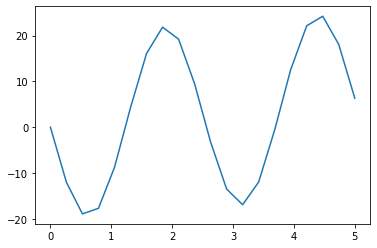

In [551]:
plt.plot(x, fx)
plt.show()

In [552]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Решение

In [553]:
#Запускаем оптимизацию, указываем начальную точку, метод и условия успеха
params = np.random.uniform(low=-5, high=5, size=(2,))
res = minimize(error, params, method='nelder-mead', options = {'xtol': 1e-10, 'disp' : True} )

Optimization terminated successfully.
         Current function value: 241.474709
         Iterations: 108
         Function evaluations: 215


In [554]:
#Окно результатов
res

 final_simplex: (array([[ 1.19065725, -3.92465288],
       [ 1.19065725, -3.92465288],
       [ 1.19065725, -3.92465288]]), array([241.47470853, 241.47470853, 241.47470853]))
           fun: 241.47470852947814
       message: 'Optimization terminated successfully.'
          nfev: 215
           nit: 108
        status: 0
       success: True
             x: array([ 1.19065725, -3.92465288])

In [555]:
#Лучшие параметры
res.x

array([ 1.19065725, -3.92465288])

Сделаем несколько итераций

In [556]:
itlist = []
reslist = []
result = 0.0000000001

for kk in range(100):
    
    params = np.random.uniform(low=-5, high=5, size=(2,))
    res = minimize(error, params, method='nelder-mead', options = {'xtol': 1e-10, 'disp' : False} )
    
    itlist.append(res.nit)
    reslist.append(error(res.x))
    
    if res.fun < result:
        result = res.fun
        best_params = res.x

In [557]:
res.x

array([1.95282587, 1.56625207])

Подтверждено многими экспериментами :) 

На самом деле получались также и другие числа, но здесь можно анализировать также число итераций плюс сравнивать конкретные результаты 

## Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

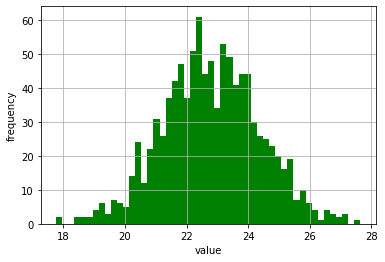

In [558]:
plt.figure()

#Создаем случайную величину и задаем число выборок
elements = np.random.uniform(low=0, high=42, size=(20,)).round()
n = 1000

#Делаем 1000 выборок размера 50, считаем среднее для каждой
values = np.zeros((n, 1))
for i in range(n):
    values[i,0] = np.mean(np.random.choice(elements, 50))
    
#Рисуем 
plt.hist(values, 50, color = 'g')
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid()

plt.show()

## Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

m = np.array([[1, 4],
              [1, 1]])
              
print(m)

In [559]:
m = np.array( [[1, 4], [1, 1]] )
m

array([[1, 4],
       [1, 1]])

In [560]:
#Используем команду из linalg и сразу обращаемся к обоим объектам
w, v = np.linalg.eig(m)

for i in range(len(w)):
    
    print("Собственное значение ", w[i])
    print("соответствующий ему собственный вектор ", v[i] )
    print('')

Собственное значение  3.0000000000000004
соответствующий ему собственный вектор  [ 0.89442719 -0.89442719]

Собственное значение  -0.9999999999999996
соответствующий ему собственный вектор  [0.4472136 0.4472136]



In [561]:
np.linalg.eig(m)

(array([ 3., -1.]), array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))